# MAST30034 Project 1
## Statistical Modelling

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols, glm

In [102]:
from functools import reduce 
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Tutorial 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

COLS = ['pickup_location', 'passenger_count', 'fare_amount', 'trip_distance_km', 'trip_time_min', 'pickup_hour_time', 'temp', 'dew_point', 'pressure', 'wind_speed', 'wind_direction']

df = pd.read_parquet("../data/curated/combined")
df = df.sample(frac=0.005, replace=True, random_state=1)
variables = df[COLS]
df['tip_amount'] = np.where(df['tip_amount'] > 0, 1, df['tip_amount'])
target = df['tip_amount']

scaler = StandardScaler()
scaled_pd = scaler.fit_transform(variables)
variables_scaled = pd.DataFrame(scaled_pd, columns = COLS)
estimator = SVR(kernel="linear")
sfs = RFE(estimator, n_features_to_select=5)
selector = sfs.fit(variables_scaled, target)
selector.get_feature_names_out(COLS)

array(['fare_amount', 'trip_distance_km', 'trip_time_min',
       'pickup_hour_time', 'dew_point'], dtype=object)

## Neutral Network

In [104]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense, Normalization
from sklearn.model_selection import train_test_split

In [250]:
df = pd.read_parquet("../data/curated/combined")
COLS = ['fare_amount', 'trip_distance_km', 'trip_time_min', 'temp']
variables = df[COLS]
target = df['tip_amount']
normalized_df=(variables-variables.min())/(variables.max()-variables.min())
normalized_df['tip_amount'] = target
normalized_df['pickup_hour_time'] = df['pickup_hour_time']
normalized_df = normalized_df.drop(normalized_df[normalized_df.tip_amount == 0].index)
df = normalized_df
df

,fare_amount,trip_distance_km,trip_time_min,temp,tip_amount,pickup_hour_time
1,0.158445,0.258407,0.205361,1.000000,8.50,0
2,0.062458,0.084488,0.122268,1.000000,3.06,0
5,0.069155,0.070909,0.174239,1.000000,2.00,0
6,0.026742,0.022846,0.041817,1.000000,1.46,0
7,0.022278,0.021775,0.029037,1.000000,1.26,0
...,...,...,...,...,...,...
3435331,0.180767,0.314652,0.212722,0.749104,7.19,23
3435332,0.020046,0.019833,0.025844,0.749104,5.00,23
3435333,0.098174,0.138792,0.172430,0.749104,3.50,23
3435334,0.069155,0.081033,0.158399,0.749104,5.04,23


In [214]:
df = pd.read_parquet("../data/curated/combined")
COLS = ['tip_amount', 'fare_amount', 'trip_distance_km', 'trip_time_min','temp', 'pickup_hour_time']
df = df[COLS]

In [251]:
df = pd.get_dummies(df, columns=['pickup_hour_time'])
df

,fare_amount,trip_distance_km,trip_time_min,temp,tip_amount,pickup_hour_time_0,pickup_hour_time_1,pickup_hour_time_2,pickup_hour_time_3,pickup_hour_time_4,...,pickup_hour_time_14,pickup_hour_time_15,pickup_hour_time_16,pickup_hour_time_17,pickup_hour_time_18,pickup_hour_time_19,pickup_hour_time_20,pickup_hour_time_21,pickup_hour_time_22,pickup_hour_time_23
1,0.158445,0.258407,0.205361,1.000000,8.50,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.062458,0.084488,0.122268,1.000000,3.06,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.069155,0.070909,0.174239,1.000000,2.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.026742,0.022846,0.041817,1.000000,1.46,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.022278,0.021775,0.029037,1.000000,1.26,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435331,0.180767,0.314652,0.212722,0.749104,7.19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3435332,0.020046,0.019833,0.025844,0.749104,5.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3435333,0.098174,0.138792,0.172430,0.749104,3.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3435334,0.069155,0.081033,0.158399,0.749104,5.04,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [252]:
TARGET_COLS = ['tip_amount']

train, test = train_test_split(df, train_size=0.8, random_state=0)

X_train, y_train = train.drop(TARGET_COLS, axis=1), train[TARGET_COLS]
X_test, y_test = test.drop(TARGET_COLS, axis=1), test[TARGET_COLS]

print(f'{len(X_train)} training instances, {len(X_test)} test instances')

1807773 training instances, 451944 test instances


In [253]:
# Setup a normalization layer and adapt it to the training set so that it knows
# what mean and sd to use when normalising
norm_layer = Normalization()
norm_layer.adapt(X_train)

In [254]:
model = keras.Sequential(
    [   
        norm_layer,                   # our normalisation layer recieves the input
        Dense(5, activation='relu'),  # the hidden layer gets the normalised result
        Dense(5, activation='relu'),   # (in case you want to try an extra hidden layer)
        Dense(1, activation='relu')   # and the output layer has a single node which will estimate total_amount
    ]
)

In [255]:
model.compile(
    optimizer='adam',  # Adam optimises using gradient descent, is generally fast and a good choice in many cases
    loss='MSE'  # Mean Squared Error makes sense for this problem, 
                # though we could use Mean Absolute Error, or many other choices.
                # Classification outputs would use a different loss (eg. BinaryCrossentropy)
)

In [256]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=200,
    validation_split=0.20,
    epochs=10
)

Epoch 1/10
7232/7232 [==============================] - 5s 634us/step - loss: 2.0974 - val_loss: 1.9676
Epoch 2/10
7232/7232 [==============================] - 5s 641us/step - loss: 1.9787 - val_loss: 1.9653
Epoch 3/10
7232/7232 [==============================] - 4s 609us/step - loss: 1.9770 - val_loss: 1.9656
Epoch 4/10
7232/7232 [==============================] - 4s 606us/step - loss: 1.9761 - val_loss: 1.9646
Epoch 5/10
7232/7232 [==============================] - 4s 608us/step - loss: 1.9750 - val_loss: 1.9668
Epoch 6/10
7232/7232 [==============================] - 4s 607us/step - loss: 1.9753 - val_loss: 1.9722
Epoch 7/10
7232/7232 [==============================] - 4s 618us/step - loss: 1.9744 - val_loss: 1.9639
Epoch 8/10
7232/7232 [==============================] - 4s 616us/step - loss: 1.9745 - val_loss: 1.9692
Epoch 9/10
7232/7232 [==============================] - 5s 645us/step - loss: 1.9736 - val_loss: 1.9635
Epoch 10/10
7232/7232 [==============================] - 4s 610u

In [257]:
comparison = y_test.copy()
comparison.loc[:, 'prediction'] = model.predict(X_test)
comparison

14124/14124 [==============================] - 5s 366us/step


,tip_amount,prediction
842475,1.45,1.261032
632835,2.50,4.768383
896096,1.56,1.624838
3188960,1.26,1.327786
1311309,4.49,3.808471
...,...,...
1798998,7.20,5.304352
2065029,1.06,1.268942
34166,1.00,1.527292
1381487,3.76,3.587886


In [258]:
predictions = model.predict(X_test)
errors = np.array(predictions - y_test)
squared_errors = errors**2
tot_sum_squares = (np.array(y_test - y_test.mean())**2).sum()
r2 = 1 - (squared_errors.sum() / tot_sum_squares)
print(f'Model R^2: {r2:.4f}')

14124/14124 [==============================] - 5s 367us/step
Model R^2: 0.5412


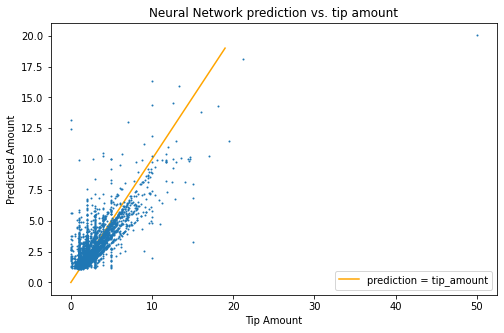

In [267]:
comparison.sort_values(by=['tip_amount'])
x = comparison['tip_amount']
y = comparison['prediction']
fig, ax = plt.subplots(figsize=(8,5))
line = range(20)
onetoone = [x for x in range(20)]
fare_df = pd.DataFrame({"Tip Amount": x, "Predicted Amount":y})
fare_df = fare_df.sample(frac=0.01, replace=True, random_state=1)
p = np.poly1d(np.polyfit(x, y, 1))
tip_reg = [p(x) for x in range(20)]
ax.plot(line, onetoone, zorder=1, color = 'orange')
fare_df.plot(kind='scatter', x= 'Tip Amount', y= 'Predicted Amount', s = 1, title="Neural Network: prediction vs. tip amount", ax = ax, zorder =-1) 
plt.legend(['prediction = tip_amount', 'R^2 = 0.5412'], loc = 'lower right')

## Linear regression

In [325]:
df = pd.read_parquet("../data/curated/combined")
df = df.drop(df[df.tip_amount == 0].index)
variables = ['fare_amount', 'trip_distance_km', 'trip_time_min','temp', 'pickup_hour_time']
X = df[variables]
y = df['tip_amount']

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [327]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [328]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [329]:
predictions = model.predict(X_test)
errors = np.array(predictions - y_test)
squared_errors = errors**2
tot_sum_squares = (np.array(y_test - y_test.mean())**2).sum()
r2 = 1 - (squared_errors.sum() / tot_sum_squares)
print(f'Model R^2: {r2:.4f}')

Model R^2: 0.5456


Text(60, 17, 'R^2 = 0.5456')

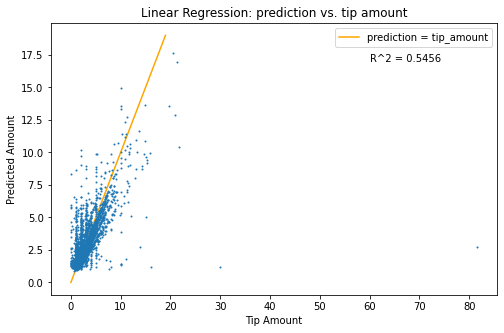

In [330]:
y = predictions
x = y_test
fig, ax = plt.subplots(figsize=(8,5))
line = range(20)
onetoone = [x for x in range(20)]
fare_df = pd.DataFrame({"Tip Amount": x, "Predicted Amount":y})
fare_df = fare_df.sample(frac=0.01, replace=True, random_state=1)
p = np.poly1d(np.polyfit(x, y, 1))
tip_reg = [p(x) for x in range(20)]
ax.plot(line, onetoone, zorder=1, color = 'orange')
fare_df.plot(kind='scatter', x= 'Tip Amount', y= 'Predicted Amount', s = 1, title="Linear Regression: prediction vs. tip amount", ax = ax, zorder =-1) 
plt.legend(['prediction = tip_amount'], loc = 'upper right')
ax.annotate(f"R^2 = {r2:.4f}", (60, 17))

### Elastic Net Regression


In [350]:
df = pd.read_parquet("../data/curated/combined")
df = df.drop(df[df.tip_amount == 0].index)
variables = ['fare_amount', 'trip_distance_km', 'trip_time_min','temp', 'pickup_hour_time']
X = df[variables]
y = df['tip_amount']

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [368]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

TypeError: 'float' object cannot be interpreted as an integer

In [384]:
from sklearn.linear_model import ElasticNet
for i in range(1, 10):
    model = ElasticNet(random_state=1, l1_ratio = i/100)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    errors = np.array(predictions - y_test)
    squared_errors = errors**2
    tot_sum_squares = (np.array(y_test - y_test.mean())**2).sum()
    r2 = 1 - (squared_errors.sum() / tot_sum_squares)
    print(f'Model R^2: {r2:.4f}')

Model R^2: 0.5164
Model R^2: 0.5156
Model R^2: 0.5147
Model R^2: 0.5138
Model R^2: 0.5129
Model R^2: 0.5120
Model R^2: 0.5110
Model R^2: 0.5101
Model R^2: 0.5091


In [393]:
for i in range(1, 10):
    model = ElasticNet(random_state=1, l1_ratio = 0.001, alpha = i/100)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    errors = np.array(predictions - y_test)
    squared_errors = errors**2
    tot_sum_squares = (np.array(y_test - y_test.mean())**2).sum()
    r2 = 1 - (squared_errors.sum() / tot_sum_squares)
    print(f'Model R^2: {r2:.4f}')

Model R^2: 0.5675
Model R^2: 0.5665
Model R^2: 0.5656
Model R^2: 0.5649
Model R^2: 0.5643
Model R^2: 0.5637
Model R^2: 0.5632
Model R^2: 0.5627
Model R^2: 0.5623


In [394]:
model = ElasticNet(random_state=1, l1_ratio = 0.001, alpha = 0.001)
model.fit(X_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.001, random_state=1)

In [395]:
predictions = model.predict(X_test)
errors = np.array(predictions - y_test)
squared_errors = errors**2
tot_sum_squares = (np.array(y_test - y_test.mean())**2).sum()
r2 = 1 - (squared_errors.sum() / tot_sum_squares)
print(f'Model R^2: {r2:.4f}')

Model R^2: 0.5683


Text(2, 25, 'R^2 = 0.5683')

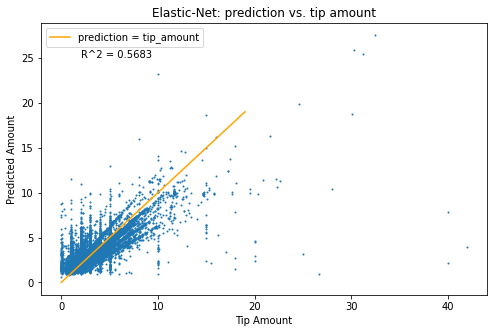

In [405]:
y = predictions
x = y_test
fig, ax = plt.subplots(figsize=(8,5))
line = range(20)
onetoone = [x for x in range(20)]
fare_df = pd.DataFrame({"Tip Amount": x, "Predicted Amount":y})
fare_df = fare_df.sample(frac=0.05, replace=True, random_state=1)
p = np.poly1d(np.polyfit(x, y, 1))
tip_reg = [p(x) for x in range(20)]
ax.plot(line, onetoone, color = 'orange')
fare_df.plot(kind='scatter', x= 'Tip Amount', y= 'Predicted Amount', s = 1, title="Elastic-Net: prediction vs. tip amount", ax = ax, zorder =-1) 
plt.legend(['prediction = tip_amount'], loc = 'upper left')
ax.annotate(f"R^2 = {r2:.4f}", (2, 25))